<h3 align="center">Дифференцирование, нахождение лимита и решение простых уравнений на Python, используя SymPy</h3>

In [1]:
from sympy.solvers import solve
from sympy import *

import matplotlib.pyplot as plt
import numpy as np

Создадим символ ```x```. Затем объявим функцию ```y(x)```. 

In [2]:
x = Symbol('x')
y = x**3 / (3 - x**2)
y

x**3/(3 - x**2)

<div class="alert alert-block alert-info">В исследовании функции первая и вторая производная играют огромную роль.</div>

Продифференцируем функцию с помощью метода ```diff()```. Т.к. мы дифференцируем по ```x```, то передадим ```x``` в качестве аргумента.

In [3]:
y_diff = y.diff(x)
y_diff

2*x**4/(3 - x**2)**2 + 3*x**2/(3 - x**2)

Выглядит не очень из-за того, что функция неприведена к общему знаменателю. Позже мы это исправим. Неудивительно, что таким же образом мы можем взять вторую производную.

In [4]:
y_second_diff = y_diff.diff(x)
y_second_diff = together(y_second_diff)
y_second_diff

2*x*(4*x**4 + 7*x**2*(3 - x**2) + 3*(3 - x**2)**2)/(3 - x**2)**3

Мы исправили прошлый недочёт с помощью функции ```together()```, которая приводит выражение к общему знаменателю (кол-во аргументов не ограничено). Теперь найдём корни самой функции, а также её первой производной. Для этого воспользуемся функцией ```solve()``` из подмодуля ```sympy.solvers```.

In [5]:
y_roots = solve(y)
y_diff_roots= solve(y_diff)
y_roots, y_diff_roots

([0], [-3, 0, 3])

<div class="alert alert-block alert-info">Если вы хотите решить уравнение типа y(x) = A, то функцию solve() стоит вызвать как solve(y, A), т.е. число, с которым сравнивают выражение, по умолчанию равно нулю.</div>

Довольно просто, не правда ли. Перейдём к лимитам. Для этого найдём наклонную асимптоту ```y(x)```, которая имеет вид ```kx + b```, где <b>k</b>:
$$\lim_{x\to\infty}{\frac{f(x)}{x}}$$
а <b>b</b>:
$$\lim_{x\to\infty}{(f(x) - kx)}$$

Чтобы вычислить лимит, воспользуемся функцией ```limit()```. Она принимает такие аргументы: функцию ```f(x)```, ```x``` и точку, к которой стремится ```x```.

In [6]:
k = limit(y / x, x, oo)
k

-1

<div class="alert alert-block alert-info">oo заменяет символ бесконечности.</div>

In [7]:
b = limit(y - k*x, x, oo)
b

0

Теперь построим график ```y(x)``` и проведём асимптоту, дабы убедится в верности своих вычислений.

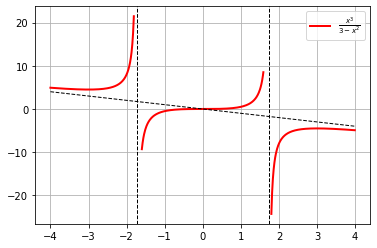

In [8]:
x_global = np.arange(-4, 4, 0.01)
x1 = np.arange(-4., -1.8, 0.01)
x2 = np.arange(-1.6, 1.6, 0.01)
x3 = np.arange(1.8, 4., 0.01)

y = lambdify(x, y, 'numpy')

y1 = y(x1)
y2 = y(x2)
y3 = y(x3)

asymptote = k * x_global + b

for x_, y_ in zip([x1, x2], [y1, y2]):
    plt.plot(x_, y_,
            color="red",
            linewidth=2)
    
plt.plot(x3, y3,
         color="red",
         linewidth=2,
         label=r"$\frac{x^3}{3 - x^2}$")    

plt.plot(x_global, asymptote,
        color='black',
        linestyle='--',
        linewidth=1)

plt.axvline(-sqrt(3), 
            color='black',
            linestyle='--', 
            linewidth=1)

plt.axvline(sqrt(3), 
            color='black', 
            linestyle='--', 
            linewidth=1)

plt.legend(loc="best")
plt.grid(True)

<div class="alert alert-block alert-info">Вся манипуляции с x1, x2 и x3 проведены для того, чтобы исключить вычисление значений функции при аргументах, близких к -√3 и √3 (ведь они являются точками разрыва).</div>

Как видите, при значениях $y \in (-\infty; -\sqrt{3}) \cup (\sqrt3; \infty)$ график функции действительно стремится к найденной нами асимптоте, однако не пересекает её.